En esta parte intentaré predecir el voto indeciso que figura en una encuesta de intención de voto anterior a las elecciones legislativas 2017 de la provincia de Buenos Aires. 
Para eso utilizaré los conceptos y métodos vistos en la sección anterior

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
#matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
pd.set_option('display.max_columns', 500)
train_df = pd.read_csv('PBA_Oct_17_norm.csv')
train_df.head()

,%date%,%time%,%linename%,%cid%,%intro%,Genero,Edad,Estudios,fue_a_votar,voto_anterior,voto_partido,voto_candidato,voto_cfk,voto_bullrich,voto_massa,vot_randazzo,voto_cambiemos,economia_pais,economia_personal,partido_politico,imagen_gobierno_nacional,imagen_gobierno_vidal,imagen_gobierno_cfk,emocion_pais,imagen_macri,imagen_vidal,imagen_cfk,imagen_massa,imagen_randazoo,imagen_bullrich,Cantidad,ProvMunLoc,RadioCensal,NSE,FC,ProvMunFC,Localidad,ProvMun,F4,Base,Base_A,Zona,Telefonia,PonderFinal28,IDPECFK,IDPE Bullrich,IDPEMassa,IDPE Randazzo,IDPE Candidato Macri y Vidal,VotoIDPE
0,12/10/2017 00:00,1,Apu Digi,542214660002,1,Feme,60-74,Superior,"Si, fui a votar.",A otro candidato,Al Frente de Izquierda de los trabajadores,A Néstor Pitrola y Andrea Datri por Frente de ...,Nunca lo votaría,Nunca lo votaría,Nunca lo votaría,Nunca lo votaría,Nunca lo votaría,Mala,Regular negativa,A la izquierda,Mala,Regular negativa,Muy Mala,Preocupación,Muy Mala,Muy Mala,Muy Mala,Muy Mala,Muy Mala,Muy Mala,1,BUENOS AIRES ENSENADA ...,06.245.04.12,C3,06.245.04,BUENOS AIRES ENSENADA ...,PUNTA LARA,BUENOS AIRES ENSENADA,1,A,Fijo,3era,Ambos,"0,3738",0,0,0,0,0,A otro candidato
1,12/10/2017 00:00,1,Apu Digi,541147514706,1,Masc,60-74,Secundario,"Si, fui a votar.",A Esteban Bullrich y Gladys González por Cambi...,A Cambiemos de Macri y Vidal,A Esteban Bullrich y Gladys González por Cambi...,Nunca lo votaría,Muy probable que la vote,Nunca lo votaría,Nunca lo votaría,Muy probable que la vote,Buena,Regular positiva,Al radicalismo,Buena,Muy buena,Muy Mala,Enojo,Buena,Muy buena,Muy Mala,Mala,Regular negativa,Buena,1,BUENOS AIRES MORON ...,?,?,?,BUENOS AIRES MORON ...,EL PALOMAR,BUENOS AIRES MORON,1,A,Fijo,1era,Ambos,"0,1931",0,10,0,0,10,A Esteban Bullrich y Gladys González por Cambi...
2,12/10/2017 00:00,1,Apu Digi,541142972389,1,Masc,30-44,Secundario,"Si, fui a votar.",A Cristina Fernández de Kirchner y Jorge Taian...,A Cambiemos de Macri y Vidal,A Esteban Bullrich y Gladys González por Cambi...,Nunca lo votaría,Muy probable que la vote,Nunca lo votaría,Nunca lo votaría,Muy probable que la vote,Buena,Buena,A ningún espacio político,Buena,Buena,Muy Mala,Esperanza,Buena,Muy buena,Muy Mala,Regular negativa,Buena,Muy buena,1,BUENOS AIRES ALMIRANTE BROWN ...,06.028.33.10,C2,06.028.33,BUENOS AIRES ALMIRANTE BROWN ...,LONGCHAMPS,BUENOS AIRES ALMIRANTE BROWN,1,A,Fijo,3era,Ambos,"0,6664",0,10,0,0,10,A Cristina Fernández de Kirchner y Jorge Taian...
3,12/10/2017 00:00,1,Apu Digi,543364432672,1,Masc,60-74,Secundario,"Si, fui a votar.",A Esteban Bullrich y Gladys González por Cambi...,A Cambiemos de Macri y Vidal,A Esteban Bullrich y Gladys González por Cambi...,Nunca lo votaría,Muy probable que la vote,No sabe,Nunca lo votaría,Muy probable que la vote,Regular positiva,Buena,A cambiemos,Buena,Buena,Mala,Esperanza,Buena,Muy buena,Mala,Regular negativa,Regular positiva,Buena,1,BUENOS AIRES SAN NICOLAS DE LOS AR...,06.763.04.07,C2,06.763.04,BUENOS AIRES SAN NICOLAS DE LOS AR...,SAN NICOLÁS,BUENOS AIRES SAN NICOLAS DE LOS AR,1,A,Fijo,Interior,Ambos,"0,5485",0,10,NaN,0,10,A Esteban Bullrich y Gladys González por Cambi...
4,12/10/2017 00:00,1,Apu Digi,541142484646,1,Masc,45-59,Superior,"Si, fui a votar.",A Esteban Bullrich y Gladys González por Cambi...,A Cambiemos de Macri y Vidal,A Esteban Bullrich y Gladys González por Cambi...,Es poco probable que lo vote,Es probable que la vote,Es probable que la vote,Es poco probable que lo vote,Muy probable que la vote,Regular positiva,Regular positiva,A ningún espacio político,Regular positiva,Buena,Regular negativa,Esperanza,Regular positiva,Buena,Mala,Regular positiva,Regular positiva,Regular positiva,1,BUENOS AIRES LOMAS DE ZAMORA ...,06.490.09.08,C1,06.490.09,BUENOS AIRES LOMAS DE ZAMORA ...,BANFIELD,BUENOS AIRES LOMAS DE ZAMORA,1,A,Fijo,3era,Ambos,"0,5594","3,3","6,6","6,6","3,3",10,A Esteban Bullrich y Gladys González por Cambi...


In [101]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1760 entries, 0 to 1759
Data columns (total 50 columns):
%date%                          1760 non-null object
%time%                          1760 non-null int64
%linename%                      1760 non-null object
%cid%                           1760 non-null object
%intro%                         1411 non-null object
Genero                          1760 non-null object
Edad                            1760 non-null object
Estudios                        1760 non-null object
fue_a_votar                     1760 non-null object
voto_anterior                   1519 non-null object
voto_partido                    1757 non-null object
voto_candidato                  1715 non-null object
voto_cfk                        1660 non-null object
voto_bullrich                   1623 non-null object
voto_massa                      1566 non-null object
vot_randazzo                    1533 non-null object
voto_cambiemos                  1527 non-null 

In [48]:
train_df.dropna(subset=['imagen_bullrich'], inplace=True)
train_df.dropna(subset=['imagen_vidal'], inplace=True)
train_df.dropna(subset=['imagen_cfk'], inplace=True)
train_df.dropna(subset=['imagen_randazoo'], inplace=True)
train_df.dropna(subset=['voto_partido'], inplace=True)

In [4]:
train_df.voto_anterior.unique()

array(['A otro candidato',
       'A Esteban Bullrich y Gladys Gonz\xc3\xa1lez por Cambiemos',
       'A Cristina Fern\xc3\xa1ndez de Kirchner y Jorge Taiana por Unidad Ciudadana',
       'A N\xc3\xa9stor Pitrola y Andrea Datri por Frente de Izquierda de los trabajadores',
       'A Sergio Massa y Margarita Stolbizer por Frente 1Pa\xc3\xacs',
       'Vote en Blanco', 'No sabe',
       'A Florencio Randazzo y Florencia Casamiquela Por Frente Cumplir',
       nan], dtype=object)

In [49]:
age_mapping = {"16-29": 1, "30-44": 2, "45-59": 3, "60-74": 4, "Mas de 75": 5}

train_df['Edad'] = train_df['Edad'].map(age_mapping).astype(int)
gender_mapping = {"Feme": 1, "Masc": 0}
emocion_pais_mapping = {'Preocupaci\xc3\xb3n':3, 'Tristeza':1, 'Enojo':2,
       'Esperanza':5,'Tranquilidad':6, 'No sabe':4, 'Alegr\xc3\xada':7}

train_df['emocion_pais'] = train_df['emocion_pais'].map(emocion_pais_mapping)
train_df['emocion_pais'] = train_df['emocion_pais'].fillna(0).astype(int)
train_df['Genero'] = train_df['Genero'].map(gender_mapping).astype(int)
imagen_mapping = {'Muy Mala':1, 'Mala':2, 'Regular negativa':3,
       'Regular positiva':5, 'Buena':6,'Muy buena':7, 'No sabe':4}

train_df['imagen_macri'] = train_df['imagen_macri'].map(imagen_mapping)
train_df['imagen_macri'] = train_df['imagen_macri'].fillna(0).astype(int)
train_df['imagen_cfk'] = train_df['imagen_cfk'].map(imagen_mapping)
train_df['imagen_cfk'] = train_df['imagen_cfk'].fillna(0).astype(int)
train_df['imagen_vidal'] = train_df['imagen_vidal'].map(imagen_mapping)
train_df['imagen_vidal'] = train_df['imagen_vidal'].fillna(0).astype(int)
train_df['imagen_massa'] = train_df['imagen_massa'].map(imagen_mapping)
train_df['imagen_massa'] = train_df['imagen_massa'].fillna(0).astype(int)
train_df['imagen_randazoo'] = train_df['imagen_randazoo'].map(imagen_mapping)
train_df['imagen_randazoo'] = train_df['imagen_randazoo'].fillna(0).astype(int)
train_df['economia_pais'] = train_df['economia_pais'].map(imagen_mapping)
train_df['economia_pais'] = train_df['economia_pais'].fillna(0).astype(int)
train_df['economia_personal'] = train_df['economia_personal'].map(imagen_mapping)
train_df['economia_personal'] = train_df['economia_personal'].fillna(0).astype(int)
voto_cambiemos_mapping = {'Nunca lo votaría':1, 'Es poco probable que lo vote':2, 'No sabe':3,
                         'Es probable que la vote':4,'Muy probable que la vote':5}

train_df['voto_cambiemos'] = train_df['voto_cambiemos'].map(voto_cambiemos_mapping)
train_df['voto_cambiemos'] = train_df['voto_cambiemos'].fillna(0).astype(int)

train_df['voto_massa'] = train_df['voto_massa'].map(voto_cambiemos_mapping)
train_df['voto_massa'] = train_df['voto_massa'].fillna(0).astype(int)

train_df['voto_cfk'] = train_df['voto_cfk'].map(voto_cambiemos_mapping)
train_df['voto_cfk'] = train_df['voto_cfk'].fillna(0).astype(int)

train_df['vot_randazzo'] = train_df['vot_randazzo'].map(voto_cambiemos_mapping)
train_df['vot_randazzo'] = train_df['vot_randazzo'].fillna(0).astype(int)

voto_anterior_mapping = {'A otro candidato':1,
       'A Esteban Bullrich y Gladys Gonz\xc3\xa1lez por Cambiemos':2,
       'A Cristina Fern\xc3\xa1ndez de Kirchner y Jorge Taiana por Unidad Ciudadana':3,
       'A N\xc3\xa9stor Pitrola y Andrea Datri por Frente de Izquierda de los trabajadores':4,
       'A Sergio Massa y Margarita Stolbizer por Frente 1Pa\xc3\xacs':5,
       'Vote en Blanco':6, 'No sabe':7,
       'A Florencio Randazzo y Florencia Casamiquela Por Frente Cumplir':8}

train_df['voto_anterior'] = train_df['voto_anterior'].map(voto_anterior_mapping)
train_df['voto_anterior'] = train_df['voto_anterior'].fillna(0).astype(int)

In [50]:
df_filtered = train_df.filter(items=['Edad', 'emocion_pais','Genero',
                                     'imagen_macri','imagen_cfk'
                                     'economia_pais','imagen_vidal','emocion_pais',
                                     'economia_personal','imagen_randazoo','imagen_massa',
                                     'voto_cambiemos',
                                      'voto_massa',
                                    'voto_cfk',
                                    'vot_randazzo'])
df_filtered.head()

,Edad,emocion_pais,Genero,imagen_macri,imagen_vidal,emocion_pais,economia_personal,imagen_randazoo,imagen_massa,voto_cambiemos,voto_massa,voto_cfk,vot_randazzo
0,4,3,1,1,1,3,3,1,1,1,1,1,1
1,4,2,0,6,7,2,5,3,2,5,1,1,1
2,2,5,0,6,7,5,6,6,3,5,1,1,1
3,4,5,0,6,7,5,6,5,3,5,3,1,1
4,3,5,0,5,6,5,5,5,5,5,4,2,2


In [9]:
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
fmd = df_filtered
svd = TruncatedSVD(n_components=8, n_iter=200, random_state=42)
svd.fit(fmd.T)
X_embedded = TSNE(n_components=2).fit_transform(svd.components_.T)


Veamos si sucede el mismo fenómoneno del caso anterior respecto a la intención de voto a cambiemos

In [107]:
voto = df_filtered['voto_cambiemos']

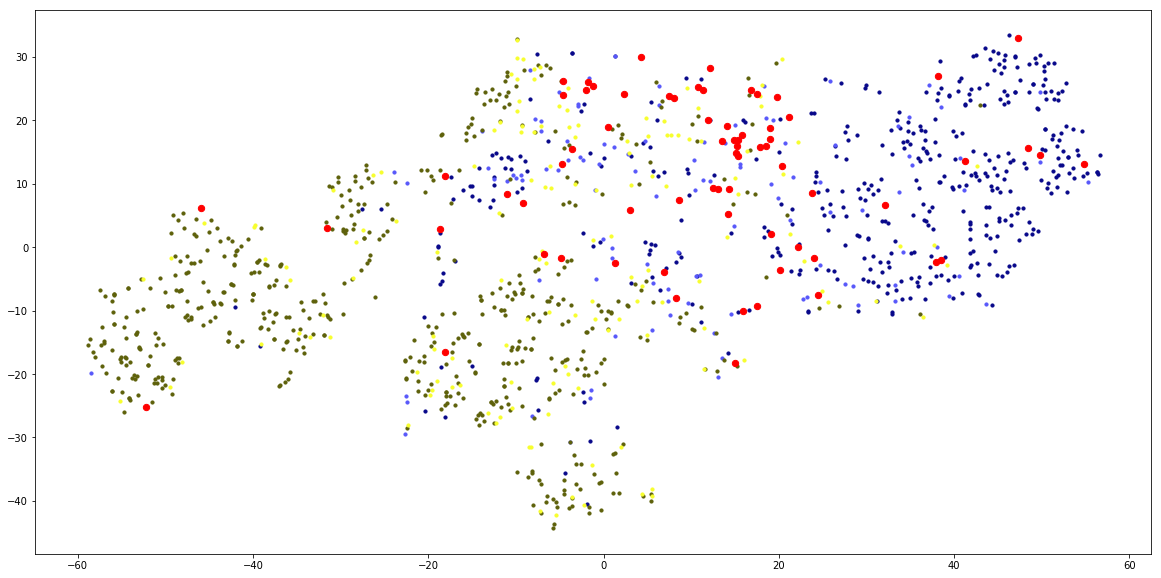

In [146]:
from matplotlib import pyplot as plt
plt.figure(figsize=(20,10))
plt.scatter(X_embedded[voto[:]==1,0], X_embedded[voto[:]==1,1], color='#08088A', s=10)
plt.scatter(X_embedded[voto[:]==2,0], X_embedded[voto[:]==2,1], color='#5858FA', s=10)
plt.scatter(X_embedded[voto[:]==5,0], X_embedded[voto[:]==5,1], color='#5E610B', s=10)
plt.scatter(X_embedded[voto[:]==4,0], X_embedded[voto[:]==4,1], color='#F7FE2E', s=10)
plt.scatter(X_embedded[voto[:]==3,0], X_embedded[voto[:]==3,1], color='r', s=40)
plt.show()

In [24]:
train_df.voto_partido.unique()

array(['Al Frente de Izquierda de los trabajadores',
       'A Cambiemos de Macri y Vidal',
       'A Unidad Ciudadana de Cristina Fernández de Kirchner', 'No sabe',
       'Al Frente 1 País de Massa y Stolbizer', 'En blanco',
       'Al Frente Cumplir de Florencio Randazzo', nan], dtype=object)

In [51]:
voto_partido_mapping = {'Al Frente de Izquierda de los trabajadores':4,
       'A Cambiemos de Macri y Vidal':1,
       'A Unidad Ciudadana de Cristina Fernández de Kirchner':2, 'No sabe':7,
       'Al Frente 1 País de Massa y Stolbizer':3, 'En blanco':6,
       'Al Frente Cumplir de Florencio Randazzo':5}

train_df['voto_partido'] = train_df['voto_partido'].map(voto_partido_mapping)
train_df['voto_partido'] = train_df['voto_partido'].fillna(0).astype(int)


In [109]:
voto_partido = train_df['voto_partido']

Veamos ahora como es la distribución del voto según la intención de voto por partido político

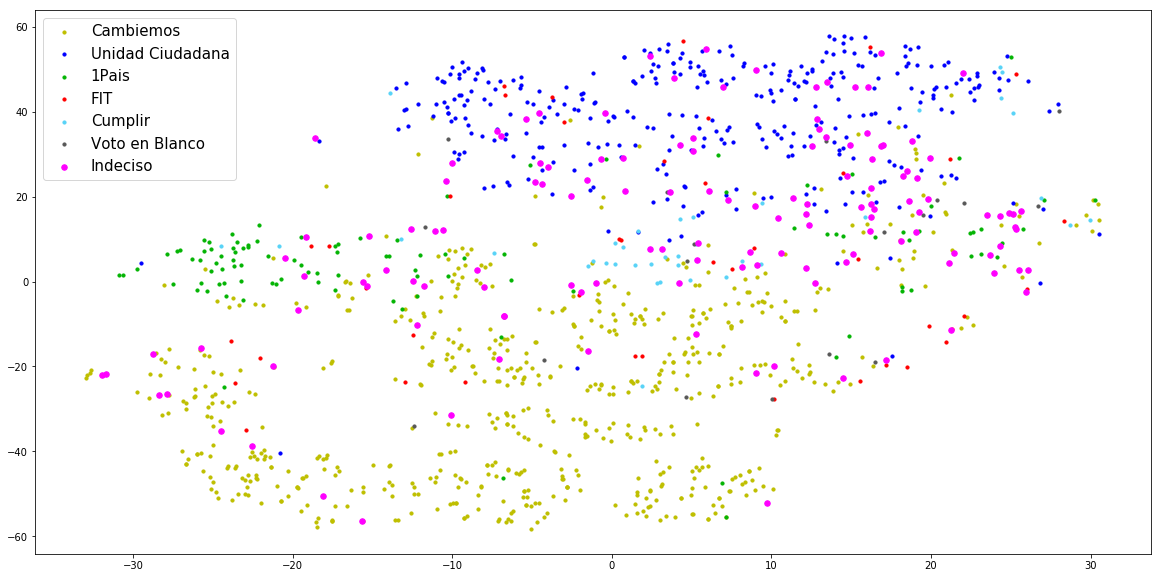

In [19]:
plt.figure(figsize=(20,10))
plt.scatter(X_embedded[voto_partido[:]==1,0], X_embedded[voto_partido[:]==1,1], color='y', s=10, label="Cambiemos")
plt.scatter(X_embedded[voto_partido[:]==2,0], X_embedded[voto_partido[:]==2,1], color='b', s=10, label="Unidad Ciudadana")
plt.scatter(X_embedded[voto_partido[:]==3,0], X_embedded[voto_partido[:]==3,1], color='#04B404', s=10, label="1Pais")#massa verde
plt.scatter(X_embedded[voto_partido[:]==4,0], X_embedded[voto_partido[:]==4,1], color='r', s=10, label="FIT")#fit rojo
plt.scatter(X_embedded[voto_partido[:]==5,0], X_embedded[voto_partido[:]==5,1], color='#58D3F7', s=10, label="Cumplir")#Randazzo celeste
plt.scatter(X_embedded[voto_partido[:]==6,0], X_embedded[voto_partido[:]==6,1], color='#585858', s=10, label="Voto en Blanco")#Blanco gris
plt.scatter(X_embedded[voto_partido[:]==7,0], X_embedded[voto_partido[:]==7,1], color='#FF00FF', s=30, label="Indeciso")#no sabe Rosa
plt.legend( prop={'size': 15})
plt.show()

Podemos ver que cada partido ocupa una posición diferenciable de los demas en el gráfico, lo que nos indica que los votantes de cada partido tienen disintas formas de responder a la encuesta respecto a los demas partidos y similares entre sí.

Lo que nos da un indicio de que puede ser posible identificar la intención de voto a los distintos partidos con la información expuesta en esta encuesta.

In [52]:
df_filtered = train_df.filter(items=['Edad', 'emocion_pais','Genero',
                                     'imagen_macri','imagen_cfk'
                                     'economia_pais','imagen_vidal',
                                     'economia_personal','imagen_randazoo',
                                     'voto_cambiemos',
                                      'voto_massa',
                                    'voto_cfk',
                                    'vot_randazzo','voto_partido'])


Aparto a aquellos usuarios que no saben aún su voto y utilizo el resto para entrenar mi modelo

In [53]:
df_filtered_saben = df_filtered.drop(df_filtered.loc[train_df['voto_partido'] == 7].index)
df_filtered_saben = df_filtered_saben.drop(df_filtered.loc[train_df['voto_partido'] == 0].index)

In [54]:
df_filtered_saben.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1176 entries, 0 to 1759
Data columns (total 12 columns):
Edad                 1176 non-null int64
emocion_pais         1176 non-null int64
Genero               1176 non-null int64
imagen_macri         1176 non-null int64
imagen_vidal         1176 non-null int64
economia_personal    1176 non-null int64
imagen_randazoo      1176 non-null int64
voto_cambiemos       1176 non-null int64
voto_massa           1176 non-null int64
voto_cfk             1176 non-null int64
vot_randazzo         1176 non-null int64
voto_partido         1176 non-null int64
dtypes: int64(12)
memory usage: 119.4 KB


In [17]:
from sklearn.model_selection import train_test_split
def clasificadores(X,y):
    X, X_test, y, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    knn = KNeighborsClassifier(n_neighbors = 3)
    knn.fit(X, y)

    acc_knn = round(knn.score(X_test, y_test) * 100, 2)


    random_forest = RandomForestClassifier(n_estimators=100)
    random_forest.fit(X, y)

    acc_random_forest = round(random_forest.score(X_test, y_test) * 100, 2)


    gaussian = GaussianNB()
    gaussian.fit(X, y)

    acc_gaussian = round(gaussian.score(X_test, y_test) * 100, 2)


    logreg = LogisticRegression()
    logreg.fit(X, y)

    acc_log = round(logreg.score(X_test, y_test) * 100, 2)


    svc = SVC()
    svc.fit(X, y)

    acc_svc = round(svc.score(X_test, y_test) * 100, 2)


    decision_tree = DecisionTreeClassifier()
    decision_tree.fit(X, y)

    acc_decision_tree = round(decision_tree.score(X_test, y_test) * 100, 2)
    return [acc_svc, acc_knn, acc_log, acc_random_forest, acc_gaussian, acc_decision_tree]


In [18]:
X = df_filtered_saben.drop("voto_partido", axis=1)
y = df_filtered_saben.filter(items=["voto_partido"])
obvio = clasificadores(X,y)
models = pd.DataFrame({
    'Clasificador': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Decision Tree'],
    'Score': obvio})
models[['Clasificador','Score']].sort_values(by='Score', ascending=False)

/home/juanma/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
/home/juanma/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


,Clasificador,Score
2,Logistic Regression,87.71
0,Support Vector Machines,87.29
3,Random Forest,86.86
1,KNN,85.17
4,Naive Bayes,84.32
5,Decision Tree,80.08


### Red Neuronal


In [19]:
%load_ext autoreload
%autoreload 2
from IPython.display import HTML
import reg_helper as RHelper
import numpy as np
import draw_nn
from matplotlib import pyplot as plt 
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint 
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.normalization import BatchNormalization
from keras import optimizers
from keras import initializers
from fnn_helper import PlotLosses
from keras import optimizers

/home/juanma/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [55]:
X = df_filtered_saben.drop("voto_partido", axis=1)
y = df_filtered_saben.filter(items=["voto_partido"])
from sklearn.model_selection import train_test_split
#train_df.voto_cambiemos_reducido.unique()
X.shape

(1176, 11)

In [56]:
np.unique(y)

array([1, 2, 3, 4, 5, 6])

In [57]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)
X_train, X_test, y_train, y_test= train_test_split(X, dummy_y, test_size=0.2, random_state=42)
dummy_y.shape

(1176, 6)

In [58]:
epochs = 1000 #adam 3000, sgd 30000
lr=0.001
decay=0
input_shape = 11
hidden_units = 30 # Probar con 3, 10, 20, 200
output_size = 6
p = 0.2
batch_size = 512 # 10 y 59

optim = optimizers.adam(lr=lr, decay=0.1)
#optim = optimizers.rmsprop(lr=lr, decay=0.001)

default_initializer = 'normal'
# Creo el modelo
model_single_layer = Sequential()
model_single_layer.add(Dense(hidden_units, input_dim=input_shape, init='RandomUniform',activation="relu"))
model_single_layer.add(BatchNormalization())

model_single_layer.add(Dense(hidden_units, kernel_initializer=default_initializer,bias_initializer=default_initializer, name='Hidden',activation="relu"))


model_single_layer.add(Dense(output_size, kernel_initializer=default_initializer, name='Salida'))
model_single_layer.add(Activation('softmax'))
model_single_layer.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 30)                360       
_________________________________________________________________
batch_normalization_3 (Batch (None, 30)                120       
_________________________________________________________________
Hidden (Dense)               (None, 30)                930       
_________________________________________________________________
Salida (Dense)               (None, 6)                 186       
_________________________________________________________________
activation_3 (Activation)    (None, 6)                 0         
Total params: 1,596
Trainable params: 1,536
Non-trainable params: 60
_________________________________________________________________


/home/juanma/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, activation="relu", kernel_initializer="RandomUniform", input_dim=11)`
  app.launch_new_instance()


In [59]:
model_single_layer.compile(loss='categorical_crossentropy', optimizer=optim, metrics=['accuracy'])

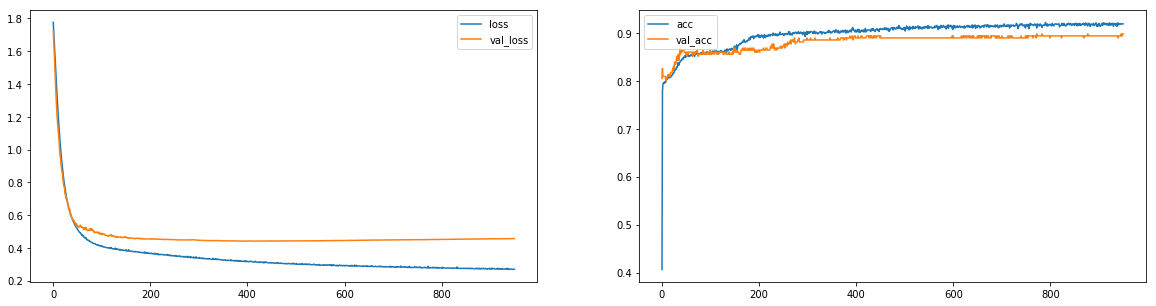

In [28]:
optim = optimizers.rmsprop(lr=lr, decay=0.01)
model_single_layer.compile(loss='categorical_crossentropy', optimizer=optim, metrics=['accuracy'])
plot_losses = PlotLosses(plot_interval=50, evaluate_interval=None, x_val=X_test, y_val_categorical=y_test)
checkpointer = ModelCheckpoint(filepath='model_pba.hdf5', verbose=0, save_best_only=True)
model_single_layer.fit(X_train, 
          y_train, batch_size = batch_size,
          epochs=epochs, 
          verbose=0, 
          validation_data=(X_test, y_test), 
          callbacks=[plot_losses, checkpointer],
         )

In [60]:
model_single_layer.load_weights('model_pba.hdf5')
loss, acc = model_single_layer.evaluate(X_test, y_test)

236/236 [==============================] - 0s 232us/step


In [61]:
print(acc)

0.885593220338983


## AHORA Predigo los que no sabian

In [62]:
df_no_saben = train_df.filter(items=['Edad', 'emocion_pais','Genero',
                                     'imagen_macri','imagen_cfk'
                                     'economia_pais','imagen_vidal',
                                     'economia_personal','imagen_randazoo',
                                     'voto_cambiemos',
                                      'voto_massa',
                                    'voto_cfk',
                                    'vot_randazzo','voto_partido','PonderFinal28'])

df_no_saben = df_no_saben.loc[df_no_saben['voto_partido'] == 7]


In [63]:
X_test_2  = df_no_saben.drop(["voto_partido",'PonderFinal28'], axis=1).copy()
y_test_2 = df_no_saben.filter(items=["voto_partido"])



test_prediction = model_single_layer.predict(X_test_2)
test_labels = np.argmax(test_prediction, axis = -1)

In [64]:
test_labels = test_labels+1

In [65]:
ponder = df_no_saben.filter(items=["PonderFinal28"])
models = pd.DataFrame({
    'Ponder': ponder["PonderFinal28"],
    'Predicto': test_labels})
models['Ponder'] = pd.to_numeric(models['Ponder'].str.replace(',', '.'), errors='coerce')
predicted = models.groupby(['Predicto'])['Ponder'].sum()
predicted

Predicto
1     69.1974
2    100.4607
3     50.9970
4      9.9464
5     23.9266
Name: Ponder, dtype: float64

In [67]:
df_ponder = train_df.filter(items=['Edad', 'emocion_pais','Genero',
                                     'imagen_macri','imagen_cfk'
                                     'economia_pais','imagen_vidal','economia_personal','imagen_randazoo','imagen_massa','voto_cambiemos','voto_partido','PonderFinal28'])
df_ponder = df_ponder.drop(df_ponder.loc[train_df['voto_partido'] == 0].index)
df_ponder['PonderFinal28'] = pd.to_numeric(df_ponder['PonderFinal28'].str.replace(',', '.'), errors='coerce')
tabla = df_ponder.groupby(['voto_partido'])['PonderFinal28'].sum()
tabla_pocentaje = tabla / np.sum(tabla) * 100
tabla_pocentaje

voto_partido
1    35.408156
2    27.863587
3     9.746776
4     3.165669
5     3.548390
6     2.060027
7    18.207394
Name: PonderFinal28, dtype: float64

### Antes de predecir

<table>
    <tr><td><b>Voto</b></td><td>Ponder</td><td>Porcentaje</td></tr>
    <tr><td>'A Cambiemos de Macri y Vidal'</td><td>556.5549 </td><td> 35.40%</td></tr>
<tr><td>'A Unidad Ciudadana de Cristina Fernández de Kirchner'</td><td>541.0992 </td><td> 27.86%</td></tr>
<tr><td>'Al Frente 1 País de Massa y Stolbizer'</td><td>177.6277 </td><td> 9.74%</td></tr>
<tr><td>'Al Frente de Izquierda de los trabajadores'</td><td>44.2541 </td><td> 3.16%</td></tr>
<tr><td>'Al Frente Cumplir de Florencio Randazzo'</td><td>49.6043 </td><td> 3.54%</td></tr>
    <tr><td>'En blanco'</td><td>28.7979,</td><td>2.06%</td></tr>
    </table>

    

In [68]:
tabla_predicta = tabla[[1,2,3,4,5,6]]
tabla_predicta[1] = tabla_predicta[1] + predicted[1]
tabla_predicta[2] = tabla_predicta[2] + predicted[2]
tabla_predicta[3] = tabla_predicta[3] + predicted[3]
tabla_predicta_porcentaje = tabla_predicta / np.sum(tabla_predicta) * 100
tabla_predicta_porcentaje

voto_partido
1    41.360306
2    35.920309
3    13.727417
4     3.244281
5     3.636505
6     2.111182
Name: PonderFinal28, dtype: float64

### Predictos
<table>
    <tr><td><b>Voto</b></td><td><b>Antes de predecir indecisos</b></td><td><b>Porcentaje predicto</b></td><td><b>Real</b></td></tr>
    <tr><td>Cambiemos</td><td>35.40%</td><td> 41.36%</td><td> 41.38%</td></tr>
<tr><td>Unidad Ciudadana</td><td>27.86%</td><td> 35.92%</td><td> 37.25%</td></tr>
<tr><td>1 País</td><td>9.74%</td><td> 13.72%</td><td> 11.32%</td></tr>
<tr><td>FIT</td><td>3.16%</td><td> 3.24%</td><td> 5.31%</td></tr>
<tr><td>Cumplir</td><td>3.54%</td><td> 3.64%</td><td> 4.75%</td></tr>
    <tr><td>En blanco</td><td>2.06%</td><td>2.11%</td><td>2.21%</td></tr>
    </table>


In [70]:
from sklearn.metrics import mean_squared_error
from math import sqrt

error = mean_squared_error(resultados_reales, tabla_predicta_porcentaje)
error

2.157859089004562

## Error cuadrático medio: 2.16
